In [162]:
import tweepy
import json
import random
import os
import pandas as pd
import time
from tqdm import tqdm
from pprint import pprint
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

In [163]:
consumer_key = "aPp14u2pIZo1nzwbNIHRTgsMR"
consumer_secret = "R20ioXz0eY2wsiShdgnamAjeZ0pzl6kMCptLcCgRvbIAw5SdnB"
access_token = "3341529021-f9xFmfjPrY2ETpkt8MFE1mYVth7EVJyLOoRpJ73"
access_token_secret = "KFKUjpEmydy3gi6vYNB9PZr0gAwALwDbegV6EW2xyVpAA"

In [164]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [165]:
path1 = "./tests/new_tweets/"

In [166]:
path2 = "./tests/people_timeline/"

In [17]:
df = pd.read_csv("./tests/new_tweets/vaccine_tweet_data.csv").sort_index(ascending=False)

In [19]:
# pd.read_csv("./tests/new_tweets/vaccine_tweet_data.csv")

In [ ]:
for i in df["id"]:
    try:
        tweet_obj = api.get_status(i, tweet_mode='extended')._json
        json.dump(tweet_obj, open(path1 + tweet_obj['id_str'] + ".json", "w"))
    except:
        print(str(i)+" does not exist")

In [1]:
# os.listdir(path)

# Collecting my timeline tweets

In [178]:
public_tweets = api.user_timeline(screen_name="Elinor_Carmi", tweet_mode='extended')
for tweet in public_tweets:
    tweet_obj = tweet._json
    json.dump(tweet_obj, open(path2 + tweet_obj['id_str'] + ".json", "w"))

In [179]:
for e in public_tweets:
    if e._json["retweeted"]:
        print("hi")

# Collecting a single tweet

In [224]:
tweet_object = api.get_status("1450108026262806533", tweet_mode='extended')

In [225]:
pprint(tweet_object._json)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Oct 18 14:34:29 +0000 2021',
 'display_text_range': [0, 271],
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/OuRrnONJpH',
                         'expanded_url': 'https://twitter.com/wihbey/status/1450108026262806533/photo/1',
                         'id': 1450107672695607296,
                         'id_str': '1450107672695607296',
                         'indices': [272, 295],
                         'media_url': 'http://pbs.twimg.com/media/FB_RPs0XEAAy93t.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/FB_RPs0XEAAy93t.jpg',
                         'sizes': {'large': {'h': 830,
                                             'resize': 'fit',
                                             'w': 1300},
                                   'medium': {'h': 766,
                                              'resize': 'fit',
                                 

In [22]:
# tweet_object._json

# Tweet collection using search function

In [111]:
tweet_obj = []
tweet_repo = []

In [127]:
path3 = "./tests/searched_tweets/"

In [113]:
query="crisis"

In [115]:
counter = 0
while(True):
    try:
        tweet_obj = api.search(query, tweet_mode='extended')
        counter += 1
        for tweet in tweet_obj:
            tweet = tweet._json
            json.dump(tweet, open(path3 + tweet['id_str'] + ".json", "w"))
            tweet_repo.append(tweet)
        if counter == 450:
            time.sleep(900)
            counter = 0
    except:
        break

In [116]:
files = [i for i in os.listdir(path3) if os.path.isfile(path3+i)]
retweets = []


for file in files:
    tw = json.load(open(path3+file))
    if tw["retweeted"]:
        retweets.append(tw)

In [117]:
len(retweets)

0

# Testing collected tweets

In [180]:
Q = []
for file in os.listdir(path2):
    Q.append(json.load(open(path2+file)))

In [181]:
f1, f2, f3, f4 = [], [], [], []

In [182]:
for tweet in tqdm(Q):
    if 'retweeted_status' in tweet.keys():
        if 'quoted_status' in tweet['retweeted_status'].keys():
            f4.append(tweet)
        else:
            f2.append(tweet)
    elif 'quoted_status' in tweet.keys():
        f3.append(tweet)
    else:
        f1.append(tweet)

100%|████████████████████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 109498.86it/s]


In [183]:
print(len(f1), len(f2), len(f3), len(f4))

76 99 19 26


In [184]:
f1_dict = {}
for item in f1:
    for key in item.keys():
        f1_dict[key] = f1_dict.get(key, 0) + 1
f1_set = set(f1_dict.keys())
        
        
f2_dict = {}
for item in f2:
    for key in item.keys():
        f2_dict[key] = f2_dict.get(key, 0) + 1
f2_set = set(f2_dict.keys())
        
        
f3_dict = {}
for item in f3:
    for key in item.keys():
        f3_dict[key] = f3_dict.get(key, 0) + 1
f3_set = set(f3_dict.keys())
        

f4_dict = {}
for item in f4:
    for key in item.keys():
        f4_dict[key] = f4_dict.get(key, 0) + 1
f4_set = set(f4_dict.keys())

In [185]:
key_union = f1_set.union(f2_set, f3_set, f4_set)
key_list = list(key_union)

In [186]:
grand_list = {}
for i in key_list:
    if i in f1_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f1_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]
        
    if i in f2_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f2_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]    
        
    if i in f3_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f3_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]   
        
    if i in f4_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f4_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]

In [187]:
print(len(f1_dict.keys()), len(f2_dict.keys()), len(f3_dict.keys()), len(f4_dict.keys()))

29 27 29 29


In [188]:
grand_list

{'quoted_status_id': [2, 0, 19, 26],
 'quoted_status_permalink': [2, 0, 19, 26],
 'favorited': [76, 99, 19, 26],
 'user': [76, 99, 19, 26],
 'display_text_range': [76, 99, 19, 26],
 'possibly_sensitive': [39, 18, 19, 2],
 'retweet_count': [76, 99, 19, 26],
 'geo': [76, 99, 19, 26],
 'quoted_status_id_str': [2, 0, 19, 26],
 'retweeted_status': [0, 99, 0, 26],
 'in_reply_to_status_id_str': [76, 99, 19, 26],
 'entities': [76, 99, 19, 26],
 'in_reply_to_user_id': [76, 99, 19, 26],
 'contributors': [76, 99, 19, 26],
 'id': [76, 99, 19, 26],
 'place': [76, 99, 19, 26],
 'coordinates': [76, 99, 19, 26],
 'quoted_status': [0, 0, 19, 0],
 'extended_entities': [20, 6, 0, 0],
 'is_quote_status': [76, 99, 19, 26],
 'truncated': [76, 99, 19, 26],
 'id_str': [76, 99, 19, 26],
 'retweeted': [76, 99, 19, 26],
 'full_text': [76, 99, 19, 26],
 'lang': [76, 99, 19, 26],
 'created_at': [76, 99, 19, 26],
 'in_reply_to_user_id_str': [76, 99, 19, 26],
 'in_reply_to_status_id': [76, 99, 19, 26],
 'in_reply_to

In [189]:
df = pd.DataFrame.from_dict(grand_list, orient='index')

<AxesSubplot:>

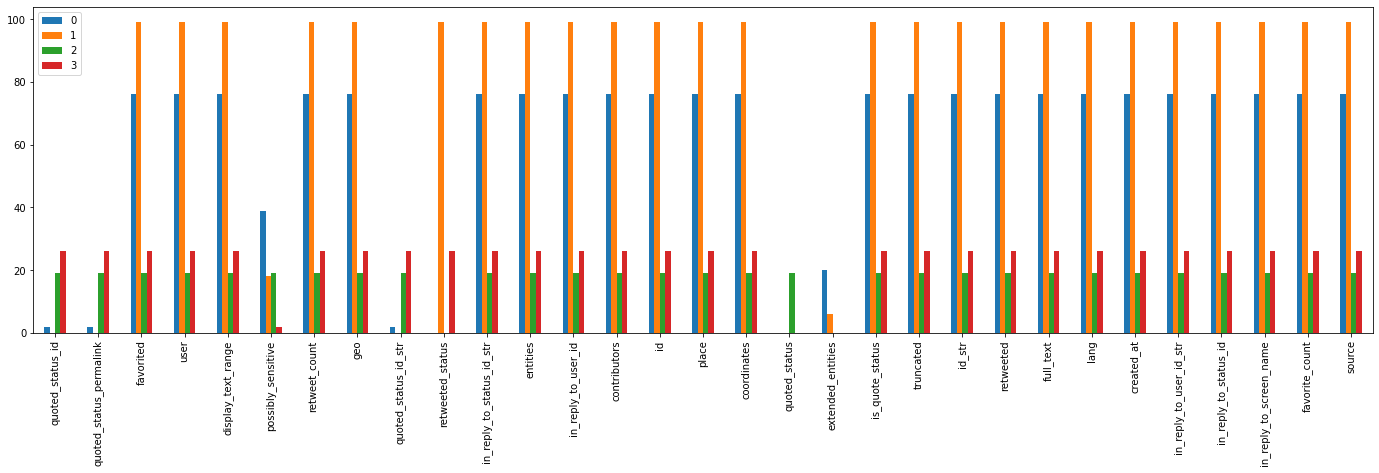

In [190]:
df.plot(kind='bar', figsize=(24,6))

In [235]:
for i in f3:
    if not ("full_text" in i["quoted_status"]):
            print(i)

{'created_at': 'Wed Sep 30 00:00:55 +0000 2020',
 'id': 1311093630866731009,
 'id_str': '1311093630866731009',
 'full_text': 'After ad-hoc fact-checking in the early 20 century, and post-hoc fact-checking in the late 80s, this is for sure a revolution in the history of journalism. https://t.co/sU5a58zLro',
 'truncated': False,
 'display_text_range': [0, 155],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/sU5a58zLro',
    'expanded_url': 'https://twitter.com/danmacg/status/1311082050364076033',
    'display_url': 'twitter.com/danmacg/status…',
    'indices': [156, 179]}]},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 3341529021,
  'id_str': '3341529021',
  'name': 'Amir',
  'screen_name': 'amiref_1991',
  'locat